### This script contains the following points:

#### 1. Importing libraries
#### 2. Importing full_merge data
#### 3. Histogram for order_hour_of_day and orders_day_of_week
#### 4. Create bar chart for loyalty_flag
#### 5. Line chart for sample of prices during order_hour_of_day
#### 6. Export visualizations

# 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 2. Importing full_merge data

In [2]:
full_merge = pd.read_pickle(r'C:\Users\kevan\Documents\Career Foundry\Data Immersion\Achievement 4\Instacart Basket Analysis\02 Data\Prepared Data\full_merge.pkl')

In [3]:
# assigning main project path to variable 'path'

path = r'C:\Users\kevan\Documents\Career Foundry\Data Immersion\Achievement 4\Instacart Basket Analysis'

# 3. Histogram for order_hour_of_day and orders_day_of_week

Text(0.5, 1.0, 'Orders by Hour of Day Histogram')

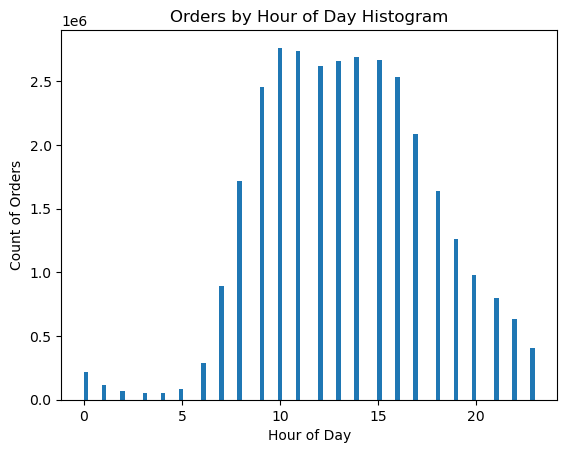

In [4]:
# increased bins to 100 to clearly see each hour of the day

hist_orders_hour = full_merge['order_hour_of_day'].plot.hist(bins = 100)
plt.xlabel('Hour of Day')
plt.ylabel('Count of Orders')
plt.title('Orders by Hour of Day Histogram')

### This histogram shows that orders begin to increase at 5:00am, peak at 10:00am, and begin to decline at 3:00pm

In [5]:
# used to verify that there is a value for each hour of the day

full_merge.value_counts('order_hour_of_day')

order_hour_of_day
10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
dtype: int64

Text(0.5, 1.0, 'Orders by Day of Week Histogram')

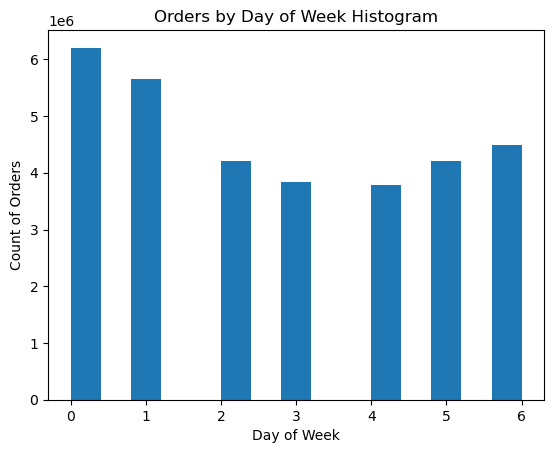

In [6]:
# Saturday is 0

hist_orders_day = full_merge['orders_day_of_week'].plot.hist(bins = 15)
plt.xlabel('Day of Week')
plt.ylabel('Count of Orders')
plt.title('Orders by Day of Week Histogram')

# 4. Create bar chart for loyalty_flag

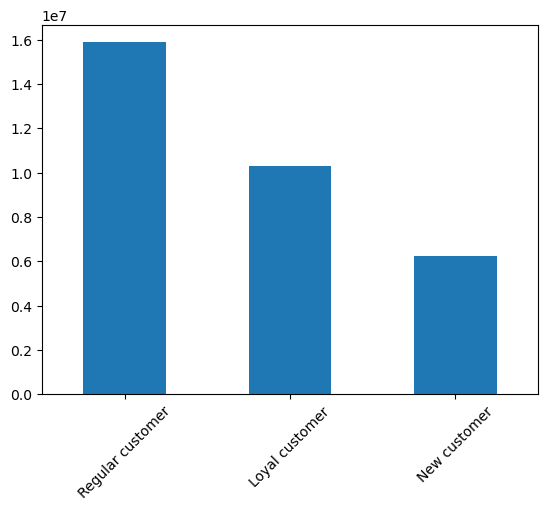

In [7]:
# count of customers with different loyalty levels

loyal_bar = full_merge['loyalty_flag'].value_counts().plot.bar()
plt.xticks(rotation = 45) # rotation of x ticks labels 
plt.show()

# 5. Line chart for sample of prices during order_hour_of_day

### Using small sample set due to size of data frame

In [8]:
# subset of full_merge

df = full_merge[:2000000]

In [9]:
# setting random seed for reproducable values

np.random.seed(4)

In [10]:
# create list of True/False results if random values are less than or equal to 0.7
# this list is the length of the full_merge df

dev = np.random.rand(len(full_merge)) <= 0.7

In [11]:
# stores true values from list which should be 70% of full_merge df

big = full_merge[dev]

In [12]:
# stores false values from list which should be 30% of full_merge df

small = full_merge[~dev]

In [13]:
# verifying length of full_merge

len(full_merge)

32404859

In [14]:
# verifying length of big and small, should be equal to full_merge

len(big) + len(small)

32404859

In [15]:
# speeds up processing by only selecting columns necessary for the chart

df_2 = small[['order_hour_of_day','prices']]

Text(0.5, 1.0, 'User Spending by Hour of Day Line Chart')

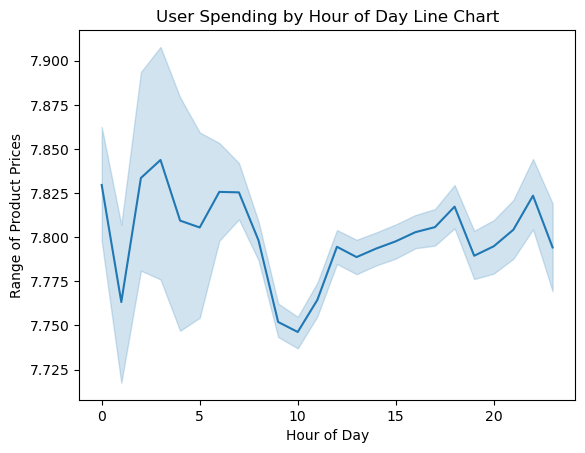

In [16]:
line_prices_orders_hour = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')
plt.xlabel('Hour of Day')
plt.ylabel('Range of Product Prices')
plt.title('User Spending by Hour of Day Line Chart')

### Users spend the most around 3:00am until 10:00am where spending reaches its lowest. 
### Around 12:00pm spending steadily increases until about 8:00pm when spending dips again. 
### There is another spike of spending around 11:00pm, then it dips until about 1:00am.

# 6. Export visualizations

In [17]:
# histogram for orders_hour_of_day
hist_orders_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_hour.png'))

In [18]:
hist_orders_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'his_orders_day.png'))

In [19]:
# bar chart for loyalty_flag
loyal_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [20]:
line_prices_orders_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_orders_hour.png'))